Load  the data

In [3]:
import pandas as pd 
import numpy as np 

In [5]:
data = pd.read_csv('../day3/datasets/boston_housing.csv')
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


# Convert the dataframe to numpy array using 
`.values`

In [6]:
clean_data = data[["RM","MEDV"]].values

In [7]:
clean_data[:20]

array([[  6.57500000e+00,   5.04000000e+05],
       [  6.42100000e+00,   4.53600000e+05],
       [  7.18500000e+00,   7.28700000e+05],
       [  6.99800000e+00,   7.01400000e+05],
       [  7.14700000e+00,   7.60200000e+05],
       [  6.43000000e+00,   6.02700000e+05],
       [  6.01200000e+00,   4.80900000e+05],
       [  6.17200000e+00,   5.69100000e+05],
       [  5.63100000e+00,   3.46500000e+05],
       [  6.00400000e+00,   3.96900000e+05],
       [  6.37700000e+00,   3.15000000e+05],
       [  6.00900000e+00,   3.96900000e+05],
       [  5.88900000e+00,   4.55700000e+05],
       [  5.94900000e+00,   4.28400000e+05],
       [  6.09600000e+00,   3.82200000e+05],
       [  5.83400000e+00,   4.17900000e+05],
       [  5.93500000e+00,   4.85100000e+05],
       [  5.99000000e+00,   3.67500000e+05],
       [  5.45600000e+00,   4.24200000e+05],
       [  5.72700000e+00,   3.82200000e+05]])

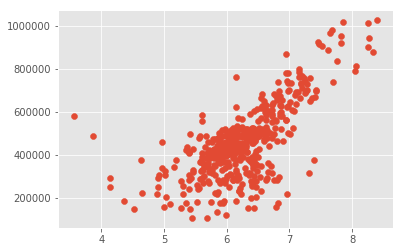

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# don't use this line as it's for pandas
# plt.plot("scatter", cd[:,0], clean_data[:1])

plt.scatter(clean_data[:,0],clean_data[:,1])
plt.show()

Function to calculate error

In [15]:
def compute_errors(m, b, points):
    total_error = 0
    for point in points:
        x = point[0]
        y = point[1]
        
        
        total_error += (y - (m *x + b) ) ** 2
        
    return total_error / len(points)

compute_errors(0,0,clean_data)

233709014171.77914

In [7]:
def compute_errors(m,b, points):
    error = 0
    for point in points:
        x = point[0]
        y = point[1]
        
        error += (y - (m*x + b))**2
    
    
    return error / len(points)
        

In [8]:
# to call the function 


compute_errors(0,0,clean_data)

233709014171.77914

Code to do the calculations


In [16]:
#get the data 
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    
    for i in range(0, len(points)):
        
        x = points[i,0]
        y = points[i,1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
        
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [17]:
#how to use the function
step_gradient(0,0,clean_data, 0.0001)

[90.868588957055238, 581.85542233128797]

In [22]:
points = clean_data

learning_rate = 0.001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 10000

b = initial_b
m = initial_m
first_error = compute_errors(m,b,points)
print("We are starting at  b = ",initial_b," m = ", initial_m, "start error= ", first_error )
error_list = []
for i in range(num_iterations):
    
    b,m = step_gradient(b,m, points, learning_rate)
    error_list.append(compute_errors(m,b,points))
    
print("Ending at b = ", b, " m = ", m, "error = ", error_list[-1])
    

We are starting at  b =  0  m =  0 start error=  233709014172.0
Ending at b =  -113603.630655  m =  91915.5511516 error =  17194167755.5


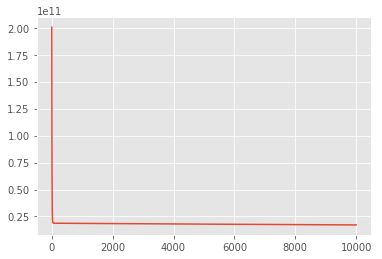

In [23]:
plt.plot(error_list)


In [24]:
x = np.arange(1,10)
y = m*x + b
print(x)
print(y)

[1 2 3 4 5 6 7 8 9]
[ -21688.07950384   70227.47164774  162143.02279931  254058.57395089
  345974.12510246  437889.67625404  529805.22740562  621720.77855719
  713636.32970877]


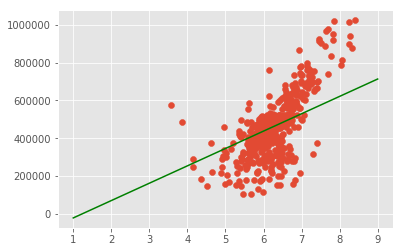

In [25]:
plt.scatter(clean_data[:,0],clean_data[:,1])


plt.plot(x,y,c="g")

## How good is your model?


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    clean_data[:,0],clean_data[:,1],test_size=0.3,
    random_state = 24
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(342,)
(147,)
(342,)
(147,)


In [44]:
#personal trainer for free
points = np.zeros((X_train.shape[0],2))
points[:,0] = X_train
points[:,1] = y_train

learning_rate = 0.001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 10000

b = initial_b
m = initial_m
first_error = compute_errors(m,b,points)
print("We are starting at  b = ",initial_b," m = ", initial_m, "start error= ", first_error )
error_list = []
for i in range(num_iterations):
    
    b,m = step_gradient(b,m, points, learning_rate)
    error_list.append(compute_errors(m,b,points))
    
print("Ending at b = ", b, " m = ", m, "error = ", error_list[-1])
    

We are starting at  b =  0  m =  0 start error=  235702417632.0
Ending at b =  -107912.069907  m =  91318.3996483 error =  17168520262.3


In [45]:
#predict 
points_test = np.zeros((X_test.shape[0],2))
points_test[:,0] = X_test
points_test[:,1] = y_test

predictions = []

for point in points_test:
    y_predicted = m * point[0] + b
    predictions.append(y_predicted)

print(predictions)
    


[506386.80452699674, 470589.9918648749, 450956.53594049689, 456892.23191763432, 269963.46783762582, 420182.23525902984, 446573.25275737984, 474334.04625045398, 461001.55990180658, 489766.85579101153, 496433.09896533523, 413424.67368505785, 531134.09083167766, 527390.03644609882, 478078.10063603305, 445386.11356195243, 479265.23983146047, 481822.15502161201, 450408.62554260722, 513053.04770132032, 486844.66700226691, 492506.40778045967, 491410.58698468044, 435432.40800029092, 452508.9487345175, 508487.12771890691, 478899.9662328675, 484744.34381035675, 476890.96144060552, 479813.15022935014, 441094.14877848368, 569670.45548324764, 531955.95642851223, 445842.70556019369, 434153.9504052152, 437441.4127925529, 520267.20127353369, 496524.41736498353, 304755.77810361667, 439085.14398622181, 417990.59366747137, 397626.59054590727, 415068.40487872681, 426300.56803546398, 501546.92934563832, 341922.36676046258, 452965.54073275876, 609211.32253094856, 426391.88643511228, 474334.04625045398, 5939

### How to score 

predictions - y_test

In [46]:
predictions - y_test

array([ -7.11131955e+04,   9.04899919e+04,   1.83565359e+04,
         1.50292232e+05,  -1.98365322e+04,  -5.23177647e+04,
         1.42073253e+05,   1.02634046e+05,   3.89015599e+04,
         2.60866856e+05,  -1.35666901e+05,   6.02467369e+03,
        -1.70265909e+05,  -9.42099636e+04,   2.05078101e+05,
         1.27861136e+04,  -1.23434760e+05,   7.86221550e+04,
         4.93086255e+04,  -1.40046952e+05,   6.26446670e+04,
        -1.14935922e+04,  -1.91089413e+05,   1.58232408e+05,
         4.72089487e+04,   1.07871277e+04,  -2.09000338e+04,
         3.84434381e+03,   2.22790961e+05,   1.79513150e+05,
        -3.98058512e+04,  -1.31729545e+05,   3.63559564e+04,
        -6.65572944e+04,   1.50653950e+05,   1.11414128e+04,
        -5.72327987e+04,  -5.37558264e+03,   1.57755778e+05,
         7.15851440e+04,   9.05936675e+01,   1.60326591e+05,
         3.28684049e+04,  -1.46994320e+04,   6.05469293e+04,
         3.53223668e+04,   1.33765541e+05,  -4.09288677e+05,
         1.68918864e+04,

In [47]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
lr.predict(X_test.reshape(-1,1))
r2 = lr.score(X_test.reshape(-1,1), y_test.reshape(-1,1))
print(r2)

print(lr.coef_)
print(lr.intercept_)
print(dir(lr))
# price = ax + by + cz + d

0.522173882037
[[ 174195.44363561]]
[-630823.01221526]
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_decision_function', '_estimator_type', '_get_param_names', '_preprocess_data', '_residues', '_set_intercept', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_jobs', 'normalize', 'predict', 'rank_', 'score', 'set_params', 'singular_']


In [48]:
X = data[["RM","LSTAT","PTRATIO"]].values
y = data["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12)  

lr = LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)
print(lr.score(X_test,y_test))
print(lr.coef_)
print(lr.intercept_)

0.631549342538
[ 80542.70502707 -12074.89153223 -19153.5225713 ]
465488.93762


**References**:
1. Code and Graphs from [Atomic Object](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/)

2. Boston Housing Data from [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)



y = a1x1 + a2x2 + a3x3 + b

Books
Elements of Statistical Learning. - Hastie and Tribshirani

 -- Pattern Recognition & Machine Learning --        - Bishop
 
 -- Pattern Recognition -- Red Color  --  Duda 


Tomorrow's Task 

Clearning the data 
Check Numpy and pandas assignment



